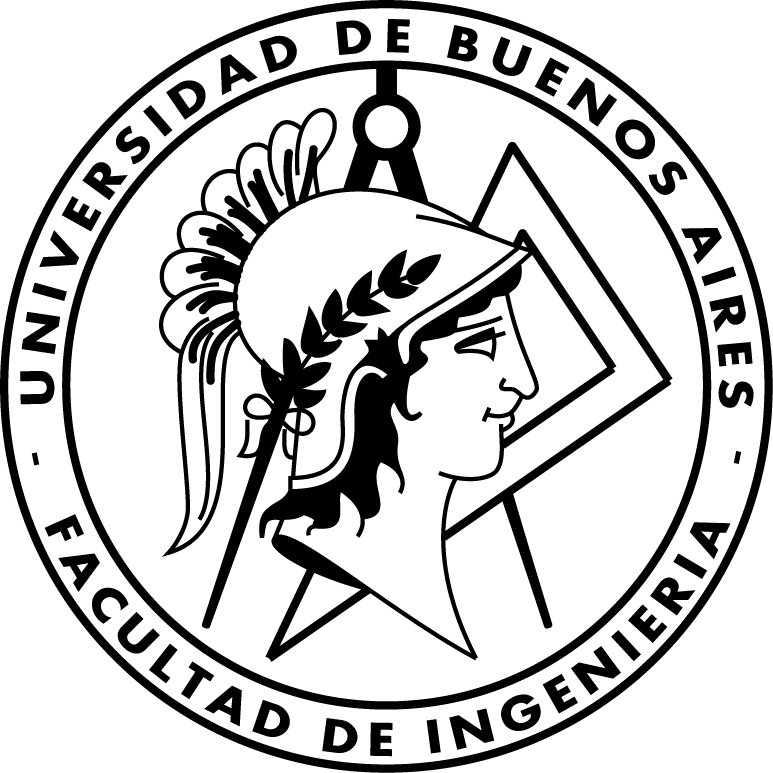

In [53]:
import bitarray
from PIL import Image
import numpy as np

#input
to_encode = "Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum."
carrier = "Logo-fiuba_big.png"
modified_image = "Logo-fiuba_big_mod.png"

#string -> lista de bits (0,1)
ba = bitarray.bitarray()
ba.frombytes(to_encode.encode('utf-8'))
l = ba.tolist()

#agrego end of mesage al mensaje original para saber interpretarlo una vez leido
for i in range(0,8):
    l.append(0)
    

image = Image.open(carrier, 'r')
msglen = len(l)
counter = 0
new_img_desc = []


#para cada pixel con forma (r,g,b,i)
a = np.asarray(image)
for j in a: #columna
    for i in j:#fila
        if counter < msglen: #si queda msg por escribir
            if l[counter]:
            #quiero un 1 en el bite menos relevante de r
                if i[0]%2 == 0:
                    i[0] = i[0]+1
            else:
            #quiero un 0 en el bite menos relevante de r
                if i[0]%2 == 1:
                    i[0] = i[0]-1
            counter = counter + 1

            
if(counter != msglen):
    print("msg to long did not write all")
mod_image = Image.fromarray(a)
mod_image.save(modified_image, "PNG")

#mostramos img original
image

Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum.


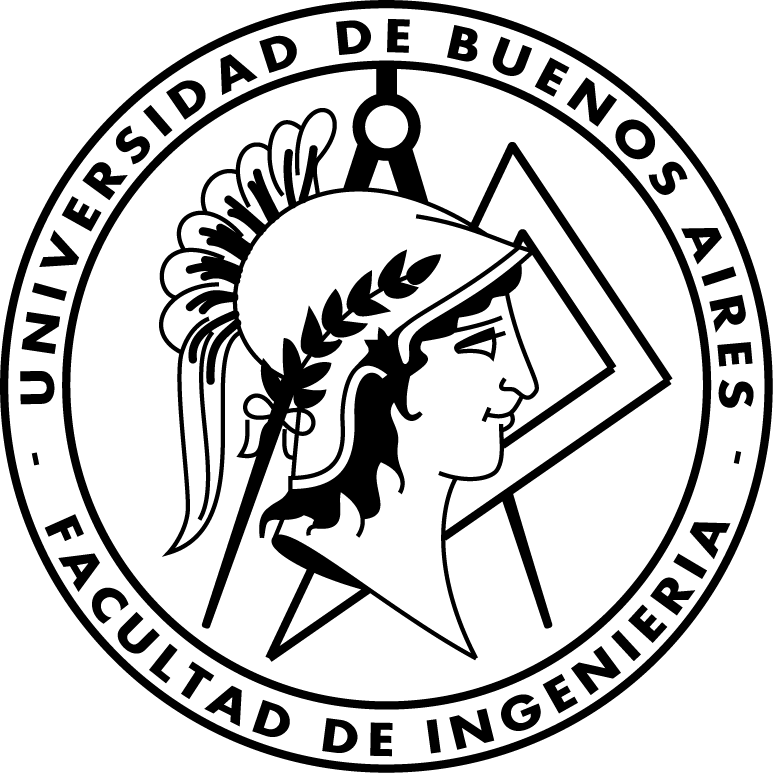

In [54]:
#decode

modified_image = "Logo-fiuba_big_mod.png"

image = Image.open(modified_image, 'r')
l = []
consecutive_ceros = 0

#itero la imagen
for i in image.getdata():
        #me quedo el bit menos significativo de r, cada iteracion
        l.append(i[0]%2)
        if i[0]%2 == 0:
            consecutive_ceros = consecutive_ceros + 1
        else:
            consecutive_ceros = 0
        #si encutnro 8 0s segudios lo interpreto como un end of msg y corto
        if consecutive_ceros == 8:
            break
#remuevo el end of msg del resultado y lo imprimo
l = l = l[:-8]
print(bitarray.bitarray(l).tobytes().decode('utf-8'))
#muestro imagen modificada         
image

In [ ]:
#to do 
    #agregar encriptacion al mensaje antes de embeberlo
    #probar metodo estadistico para detectar un mensaje encriptado
        #sospecha: un buen encriptador hace que el mensaje sea estadisticamente mas dificil de detectar.